# Problem Statement

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Salary_Data.csv')

# Data Exploration

In [3]:
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [ ]:
Exploratory data analysis(EDA)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes


In [6]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


# Data Preprocessing

# Identifying Duplicates

In [7]:
duplicated_rows = df[df.duplicated()]

print(duplicated_rows)

Empty DataFrame
Columns: [YearsExperience, Salary]
Index: []


# Identifying Missing Values

In [8]:
df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

# Identifying Outliers

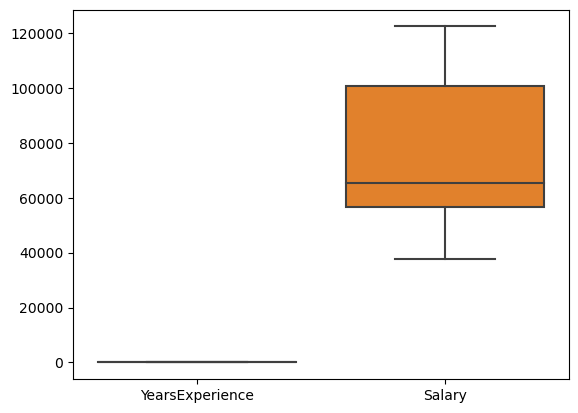

In [9]:
sns.boxplot(data=df);

# Data Visualization

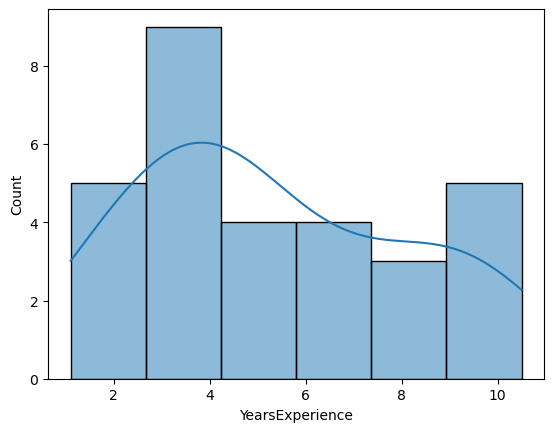

In [10]:
sns.histplot(df['YearsExperience'],kde=True);

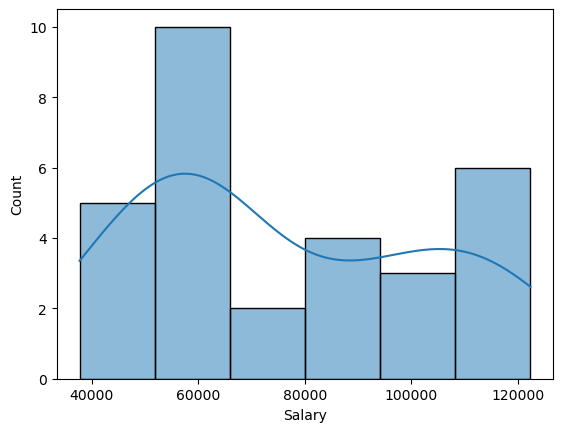

In [11]:
sns.histplot(df['Salary'],kde=True);

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


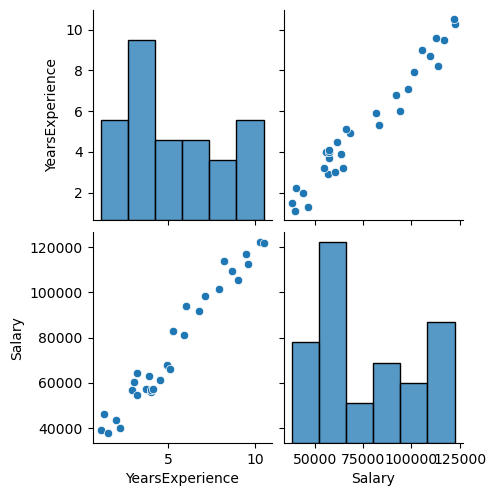

In [12]:
sns.pairplot(df);

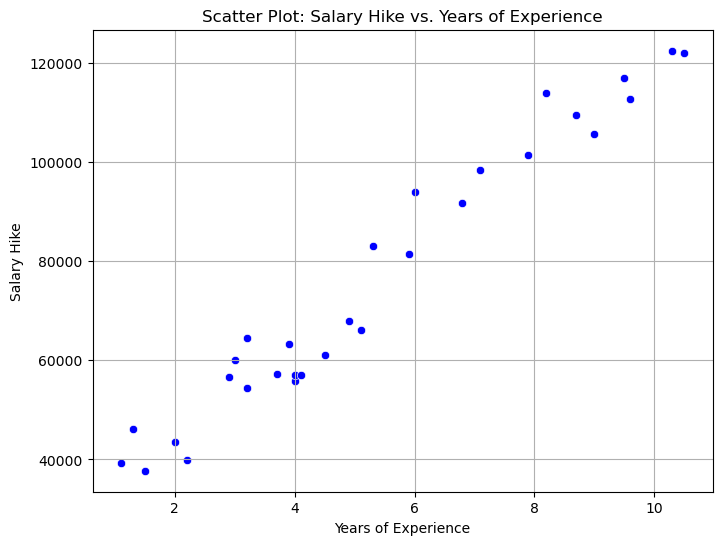

In [13]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='YearsExperience', y='Salary', color='blue')
plt.xlabel("Years of Experience")
plt.ylabel("Salary Hike")
plt.title("Scatter Plot: Salary Hike vs. Years of Experience")
plt.grid()
plt.show()

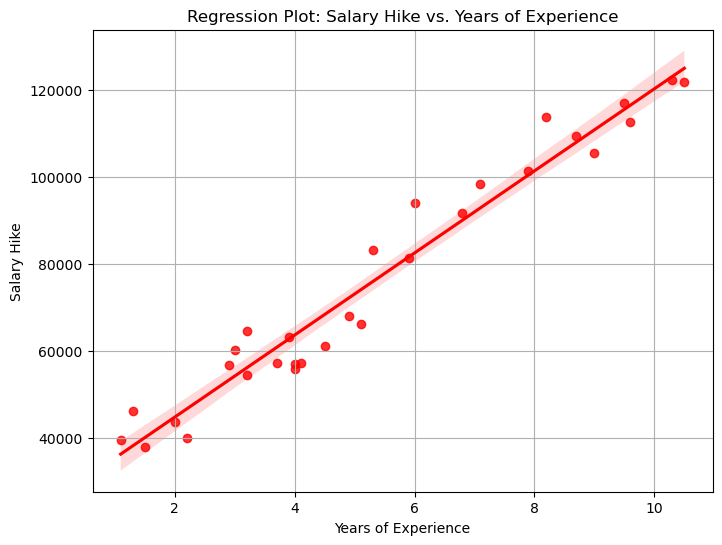

In [14]:
plt.figure(figsize=(8, 6))
sns.regplot(data=df, x='YearsExperience', y='Salary', color='red')
plt.xlabel("Years of Experience")
plt.ylabel("Salary Hike")
plt.title("Regression Plot: Salary Hike vs. Years of Experience")
plt.grid()
plt.show()

# Data Splitting

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
# Prepare the data for linear regression
X = df[['YearsExperience']]
y = df['Salary']

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Selection

In [18]:
from sklearn.linear_model import LinearRegression

In [19]:
# Create a linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Predict the salary for the testing data
predicted_salary = model.predict(X_test)

# Model Evaluation

In [21]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [22]:
# Calculate evaluation metrics
mae = mean_absolute_error(y_test, predicted_salary)
mse = mean_squared_error(y_test, predicted_salary)
rmse = mean_squared_error(y_test, predicted_salary, squared=False)
r2 = r2_score(y_test, predicted_salary)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)

Mean Absolute Error (MAE): 6286.453830757749
Mean Squared Error (MSE): 49830096.85590839
Root Mean Squared Error (RMSE): 7059.04362190151
R-squared (R2): 0.9024461774180497


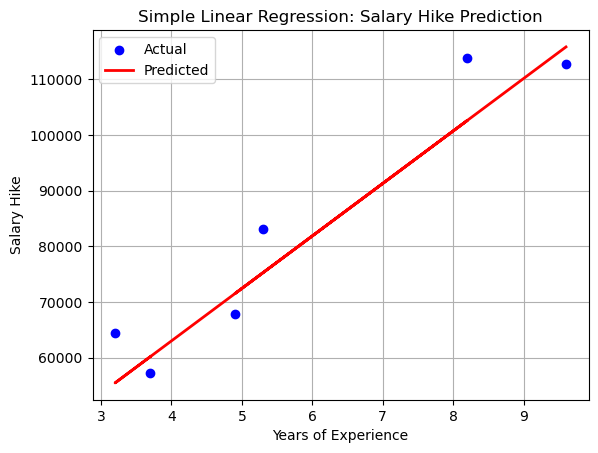

In [23]:
# Plot the regression line and the test data points
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, predicted_salary, color='red', linewidth=2, label='Predicted')
plt.xlabel("Years of Experience")
plt.ylabel("Salary Hike")
plt.legend()
plt.title("Simple Linear Regression: Salary Hike Prediction")
plt.grid()
plt.show()

# Polynomial Regression

In [24]:
from sklearn.preprocessing import PolynomialFeatures

In [25]:
polynomial_convertor = PolynomialFeatures(degree=2, include_bias=False)

In [26]:
polynomial_convertor.fit(X)

PolynomialFeatures(include_bias=False)

In [27]:
poly_features = polynomial_convertor.transform(X)

In [28]:
poly_features.shape

(30, 2)

In [29]:
poly_features[0]

array([1.1 , 1.21])

In [30]:
polynomial_convertor.fit_transform(X)

array([[  1.1 ,   1.21],
       [  1.3 ,   1.69],
       [  1.5 ,   2.25],
       [  2.  ,   4.  ],
       [  2.2 ,   4.84],
       [  2.9 ,   8.41],
       [  3.  ,   9.  ],
       [  3.2 ,  10.24],
       [  3.2 ,  10.24],
       [  3.7 ,  13.69],
       [  3.9 ,  15.21],
       [  4.  ,  16.  ],
       [  4.  ,  16.  ],
       [  4.1 ,  16.81],
       [  4.5 ,  20.25],
       [  4.9 ,  24.01],
       [  5.1 ,  26.01],
       [  5.3 ,  28.09],
       [  5.9 ,  34.81],
       [  6.  ,  36.  ],
       [  6.8 ,  46.24],
       [  7.1 ,  50.41],
       [  7.9 ,  62.41],
       [  8.2 ,  67.24],
       [  8.7 ,  75.69],
       [  9.  ,  81.  ],
       [  9.5 ,  90.25],
       [  9.6 ,  92.16],
       [ 10.3 , 106.09],
       [ 10.5 , 110.25]])

In [31]:
# Split the data into training and testing sets (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=42)

In [32]:
poly_model = LinearRegression()

In [33]:
poly_model.fit(X_train, y_train)

LinearRegression()

In [34]:
test_predictions = poly_model.predict(X_test)

In [35]:
poly_model.coef_

array([8667.32696897,   60.92217899])

# Model Evaluation

In [37]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [38]:
# Calculate evaluation metrics
MAE = mean_absolute_error(y_test,test_predictions)
MSE = mean_squared_error(y_test,test_predictions)
RMSE = np.sqrt(MSE)

print('MAE = ', MAE)
print('MSE = ', MSE)
print('RMSE = ', RMSE)

MAE =  5199.782073940221
MSE =  38366233.442827955
RMSE =  6194.048227357287


In [40]:
train_rmse_error = []
test_rmse_error = []

for d in range(1,10):
    
    poly_convertor = PolynomialFeatures(degree=d, include_bias=False)
    poly_features = poly_convertor.fit_transform(X)
    
    X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=42)
    
    poly_model = LinearRegression()
    poly_model.fit(X_train,y_train)
    
    train_pred = poly_model.predict(X_train)
    test_pred = poly_model.predict(X_test)
    
    train_rmse = np.sqrt(mean_squared_error(y_train, train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, test_pred))
    
    train_rmse_error.append(train_rmse)
    test_rmse_error.append(test_rmse)

In [41]:
train_rmse_error

[5377.937858732068,
 5359.821382288373,
 4907.351450880717,
 4886.865253398574,
 4729.283439789162,
 4698.029745921138,
 3811.2473616595084,
 3749.9483348887256,
 3405.0118552178265]

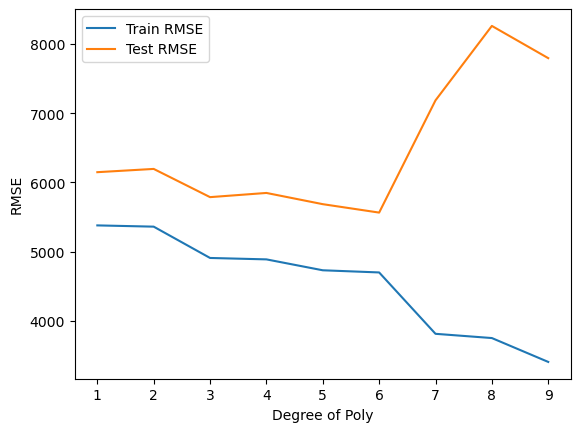

In [42]:
plt.plot(range(1,10),train_rmse_error, label='Train RMSE')

plt.plot(range(1,10),test_rmse_error, label='Test RMSE')

plt.xlabel('Degree of Poly')
plt.ylabel('RMSE')
plt.legend();

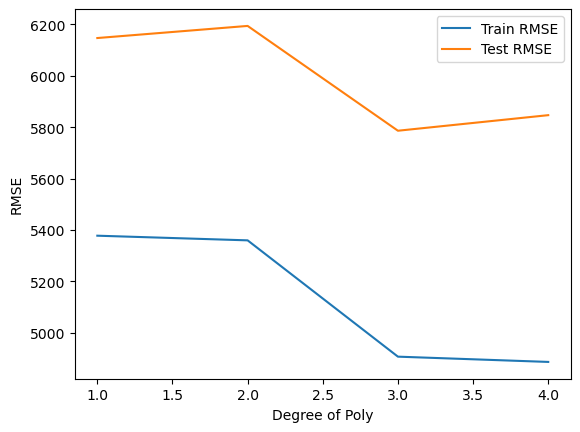

In [43]:
plt.plot(range(1,5),train_rmse_error[:4], label='Train RMSE')

plt.plot(range(1,5),test_rmse_error[:4], label='Test RMSE')

plt.xlabel('Degree of Poly')
plt.ylabel('RMSE')
plt.legend();

In [44]:
final_poly_convertor = PolynomialFeatures(degree=3, include_bias=False)

In [45]:
final_model = LinearRegression()

In [46]:
full_converted_X = final_poly_convertor.fit_transform(X)
final_model.fit(full_converted_X,y)

LinearRegression()

# Model Deployment

In [ ]:
# from joblib import dump,load

# dump(final_model, 'final_poly_model.joblib')